In [99]:
from glob import glob 
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
files = glob("D:/three years data/*/*outcomes.csv")
len(files)

36

In [54]:
df = pd.concat(map(pd.read_csv, files))
df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,9d7236ef03ef7c680655710cebb66fdf8462b2c3a6f595...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect
1,0cc4b5e80df7dfd7241510f8e5b0c680556eb2d3f2c23e...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,NaN,NaN,No location,NaN,NaN,Investigation complete; no suspect identified
2,94aef7eee988b6f1452de2bc839fc748aacf75116387dc...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect
3,583777470b2150ca7b0c17dffb8fc8c5663c2059ffbb07...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,NaN,NaN,No location,NaN,NaN,Offender given a drugs possession warning
4,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,Suspect charged
...,...,...,...,...,...,...,...,...,...,...
6027,4c0113d3f792534990161c7694dc2d9ab7c65b98d17e67...,2022-02,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.228835,51.763107,On or near Supermarket,E01023920,Welwyn Hatfield 012A,Investigation complete; no suspect identified
6028,2616825d3bfedff2b273b4372afaa21bc504fcf8ab3692...,2022-02,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.240935,51.822007,On or near AYOT ST PETER ROAD,E01023969,Welwyn Hatfield 002C,Investigation complete; no suspect identified
6029,3b79c23fc5b1a3b552fe0a9f0350dfcb44993908aa94b3...,2022-02,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.451841,51.737230,On or near SANDERS CLOSE,E01023359,Dacorum 020C,Investigation complete; no suspect identified
6030,803301a8ff80d61abbe7cf34a97f385676413a0e616240...,2022-02,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.228128,51.745274,On or near SUMMERFIELD,E01023933,Welwyn Hatfield 014A,Investigation complete; no suspect identified


In [55]:
files_2 = glob("D:/three years data/*/*street.csv")
len(files_2)

36

In [56]:
df2 = pd.concat(map(pd.read_csv, files_2))
df2.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,325469efb7b9ccc2d8944ebf9d047a11ce68eb4513e0bf...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.920242,51.847189,On or near New Street,E01017720,Aylesbury Vale 008D,Violence and sexual offences,Status update unavailable,NaN
1,636d207693728586e204d0ccec5b444af3fce3c96724b5...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.572545,51.819252,On or near B4506,E01017701,Aylesbury Vale 009E,Vehicle crime,Status update unavailable,NaN
2,4aa892eebe7aef9d25a81faf55f60e891b7f85ef8ee2cd...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.605640,51.814065,On or near Stocks Road,E01017702,Aylesbury Vale 009F,Burglary,Investigation complete; no suspect identified,NaN
3,1bb603f80a5d05e0e853f205a3127951f300468788b2e5...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.579760,51.809439,On or near B4506,E01017702,Aylesbury Vale 009F,Criminal damage and arson,Investigation complete; no suspect identified,NaN
4,c836c30192da8516f9250be47fc02c2020f17dcafc6aee...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,-1.007293,51.893136,On or near Prison,E01017674,Aylesbury Vale 010D,Other crime,Offender sent to prison,NaN


In [57]:
def merge_clean(df1, df2, key):
    
    df_merged = pd.merge(df1, df2, how="inner", on = key)
    
    for col in df_merged.columns:
        if col.endswith("_x"):
            df_merged.rename(columns = lambda col:col.rstrip("_x"), inplace = True)
        elif col.endswith("_y"):
            to_drop = [col for col in df_merged if col.endswith("_y")]
            df_merged.drop(to_drop, axis = 1, inplace = True)
        else:
            pass
    return df_merged

In [58]:
df_final = merge_clean(df, df2, "Crime ID")
df_final.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Crime type,Last outcome category,Context
0,9d7236ef03ef7c680655710cebb66fdf8462b2c3a6f595...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect,Public order,Unable to prosecute suspect,NaN
1,0cc4b5e80df7dfd7241510f8e5b0c680556eb2d3f2c23e...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,NaN,NaN,No location,NaN,NaN,Investigation complete; no suspect identified,Other theft,Investigation complete; no suspect identified,NaN
2,94aef7eee988b6f1452de2bc839fc748aacf75116387dc...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect,Violence and sexual offences,Unable to prosecute suspect,NaN
3,583777470b2150ca7b0c17dffb8fc8c5663c2059ffbb07...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,NaN,NaN,No location,NaN,NaN,Offender given a drugs possession warning,Drugs,Offender given a drugs possession warning,NaN
4,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,Suspect charged,Burglary,Offender given community sentence,NaN


In [59]:
temp = df_final.isna().sum()/(len(df))*100
print(f"Column with lowest amount of missings contains {temp.min()} % missings.")
print(f"Column with highest amount of missings contains {temp.max()} % missings.")

Column with lowest amount of missings contains 0.0 % missings.
Column with highest amount of missings contains 100.00130891765599 % missings.


In [60]:
df_final.isna().sum()/(len(df))*100

Crime ID                   0.000000
Month                      0.000000
Reported by                0.000000
Falls within               0.000000
Longitude                  1.652727
Latitude                   1.652727
Location                   0.000000
LSOA code                  1.652727
LSOA name                  1.652727
Outcome type               0.000000
Crime type                 0.000000
Last outcome category      0.000000
Context                  100.001309
dtype: float64

In [61]:
df_final = df_final.drop(['Reported by', 'Falls within', 'Context'], axis=1)
df_final

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Crime type,Last outcome category
0,9d7236ef03ef7c680655710cebb66fdf8462b2c3a6f595...,2019-03,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect,Public order,Unable to prosecute suspect
1,0cc4b5e80df7dfd7241510f8e5b0c680556eb2d3f2c23e...,2019-03,NaN,NaN,No location,NaN,NaN,Investigation complete; no suspect identified,Other theft,Investigation complete; no suspect identified
2,94aef7eee988b6f1452de2bc839fc748aacf75116387dc...,2019-03,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect,Violence and sexual offences,Unable to prosecute suspect
3,583777470b2150ca7b0c17dffb8fc8c5663c2059ffbb07...,2019-03,NaN,NaN,No location,NaN,NaN,Offender given a drugs possession warning,Drugs,Offender given a drugs possession warning
4,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,Suspect charged,Burglary,Offender given community sentence
...,...,...,...,...,...,...,...,...,...,...
229195,4c0113d3f792534990161c7694dc2d9ab7c65b98d17e67...,2022-02,-0.228835,51.763107,On or near Supermarket,E01023920,Welwyn Hatfield 012A,Investigation complete; no suspect identified,Shoplifting,Investigation complete; no suspect identified
229196,2616825d3bfedff2b273b4372afaa21bc504fcf8ab3692...,2022-02,-0.240935,51.822007,On or near AYOT ST PETER ROAD,E01023969,Welwyn Hatfield 002C,Investigation complete; no suspect identified,Other crime,Investigation complete; no suspect identified
229197,3b79c23fc5b1a3b552fe0a9f0350dfcb44993908aa94b3...,2022-02,-0.451841,51.737230,On or near SANDERS CLOSE,E01023359,Dacorum 020C,Investigation complete; no suspect identified,Other crime,Investigation complete; no suspect identified
229198,803301a8ff80d61abbe7cf34a97f385676413a0e616240...,2022-02,-0.228128,51.745274,On or near SUMMERFIELD,E01023933,Welwyn Hatfield 014A,Investigation complete; no suspect identified,Violence and sexual offences,Investigation complete; no suspect identified


In [62]:
df_final = df_final.dropna()
df_final = df_final.reset_index(drop = True)
df_final

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Crime type,Last outcome category
0,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,Suspect charged,Burglary,Offender given community sentence
1,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,Offender given community sentence,Burglary,Offender given community sentence
2,c264951babf48698c98962070f16d4668e5a4b21578505...,2019-03,-0.213159,51.765594,On or near PARK MEADOW,E01023926,Welwyn Hatfield 011C,Unable to prosecute suspect,Violence and sexual offences,Unable to prosecute suspect
3,d16988855079f14fbc86f00067bf01e1eb9e74089e5476...,2019-03,-0.035386,51.691682,On or near Parking Area,E01023332,Broxbourne 012A,Investigation complete; no suspect identified,Burglary,Investigation complete; no suspect identified
4,c8e515abd2da0e7d6b30c934c9f6504329403099d0e203...,2019-03,-0.249644,51.762762,On or near ALBATROSS WAY,E01033314,Welwyn Hatfield 010G,Offender given a caution,Drugs,Offender given a caution
...,...,...,...,...,...,...,...,...,...,...
225407,4c0113d3f792534990161c7694dc2d9ab7c65b98d17e67...,2022-02,-0.228835,51.763107,On or near Supermarket,E01023920,Welwyn Hatfield 012A,Investigation complete; no suspect identified,Shoplifting,Investigation complete; no suspect identified
225408,2616825d3bfedff2b273b4372afaa21bc504fcf8ab3692...,2022-02,-0.240935,51.822007,On or near AYOT ST PETER ROAD,E01023969,Welwyn Hatfield 002C,Investigation complete; no suspect identified,Other crime,Investigation complete; no suspect identified
225409,3b79c23fc5b1a3b552fe0a9f0350dfcb44993908aa94b3...,2022-02,-0.451841,51.737230,On or near SANDERS CLOSE,E01023359,Dacorum 020C,Investigation complete; no suspect identified,Other crime,Investigation complete; no suspect identified
225410,803301a8ff80d61abbe7cf34a97f385676413a0e616240...,2022-02,-0.228128,51.745274,On or near SUMMERFIELD,E01023933,Welwyn Hatfield 014A,Investigation complete; no suspect identified,Violence and sexual offences,Investigation complete; no suspect identified


In [63]:
df_final = df_final.drop_duplicates(subset="Crime ID")
df_final

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Crime type,Last outcome category
0,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,Suspect charged,Burglary,Offender given community sentence
2,c264951babf48698c98962070f16d4668e5a4b21578505...,2019-03,-0.213159,51.765594,On or near PARK MEADOW,E01023926,Welwyn Hatfield 011C,Unable to prosecute suspect,Violence and sexual offences,Unable to prosecute suspect
3,d16988855079f14fbc86f00067bf01e1eb9e74089e5476...,2019-03,-0.035386,51.691682,On or near Parking Area,E01023332,Broxbourne 012A,Investigation complete; no suspect identified,Burglary,Investigation complete; no suspect identified
4,c8e515abd2da0e7d6b30c934c9f6504329403099d0e203...,2019-03,-0.249644,51.762762,On or near ALBATROSS WAY,E01033314,Welwyn Hatfield 010G,Offender given a caution,Drugs,Offender given a caution
5,c84d04b70fb7d22b8c5d7b4eb280cbd401e87530818a1d...,2019-03,0.137153,51.860920,On or near PLOUGHMANS CLOSE,E01023448,East Hertfordshire 007F,Investigation complete; no suspect identified,Burglary,Investigation complete; no suspect identified
...,...,...,...,...,...,...,...,...,...,...
225407,4c0113d3f792534990161c7694dc2d9ab7c65b98d17e67...,2022-02,-0.228835,51.763107,On or near Supermarket,E01023920,Welwyn Hatfield 012A,Investigation complete; no suspect identified,Shoplifting,Investigation complete; no suspect identified
225408,2616825d3bfedff2b273b4372afaa21bc504fcf8ab3692...,2022-02,-0.240935,51.822007,On or near AYOT ST PETER ROAD,E01023969,Welwyn Hatfield 002C,Investigation complete; no suspect identified,Other crime,Investigation complete; no suspect identified
225409,3b79c23fc5b1a3b552fe0a9f0350dfcb44993908aa94b3...,2022-02,-0.451841,51.737230,On or near SANDERS CLOSE,E01023359,Dacorum 020C,Investigation complete; no suspect identified,Other crime,Investigation complete; no suspect identified
225410,803301a8ff80d61abbe7cf34a97f385676413a0e616240...,2022-02,-0.228128,51.745274,On or near SUMMERFIELD,E01023933,Welwyn Hatfield 014A,Investigation complete; no suspect identified,Violence and sexual offences,Investigation complete; no suspect identified


In [64]:
len(df_final["Crime ID"].unique())

209796

In [65]:
df_final = df_final.drop(['Last outcome category'], axis=1)
df_final

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Crime type
0,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,Suspect charged,Burglary
2,c264951babf48698c98962070f16d4668e5a4b21578505...,2019-03,-0.213159,51.765594,On or near PARK MEADOW,E01023926,Welwyn Hatfield 011C,Unable to prosecute suspect,Violence and sexual offences
3,d16988855079f14fbc86f00067bf01e1eb9e74089e5476...,2019-03,-0.035386,51.691682,On or near Parking Area,E01023332,Broxbourne 012A,Investigation complete; no suspect identified,Burglary
4,c8e515abd2da0e7d6b30c934c9f6504329403099d0e203...,2019-03,-0.249644,51.762762,On or near ALBATROSS WAY,E01033314,Welwyn Hatfield 010G,Offender given a caution,Drugs
5,c84d04b70fb7d22b8c5d7b4eb280cbd401e87530818a1d...,2019-03,0.137153,51.860920,On or near PLOUGHMANS CLOSE,E01023448,East Hertfordshire 007F,Investigation complete; no suspect identified,Burglary
...,...,...,...,...,...,...,...,...,...
225407,4c0113d3f792534990161c7694dc2d9ab7c65b98d17e67...,2022-02,-0.228835,51.763107,On or near Supermarket,E01023920,Welwyn Hatfield 012A,Investigation complete; no suspect identified,Shoplifting
225408,2616825d3bfedff2b273b4372afaa21bc504fcf8ab3692...,2022-02,-0.240935,51.822007,On or near AYOT ST PETER ROAD,E01023969,Welwyn Hatfield 002C,Investigation complete; no suspect identified,Other crime
225409,3b79c23fc5b1a3b552fe0a9f0350dfcb44993908aa94b3...,2022-02,-0.451841,51.737230,On or near SANDERS CLOSE,E01023359,Dacorum 020C,Investigation complete; no suspect identified,Other crime
225410,803301a8ff80d61abbe7cf34a97f385676413a0e616240...,2022-02,-0.228128,51.745274,On or near SUMMERFIELD,E01023933,Welwyn Hatfield 014A,Investigation complete; no suspect identified,Violence and sexual offences


In [66]:
df_final.rename(inplace=True, columns={
    'Crime ID': 'crime_id',
    'Month': 'date',
    'LSOA code': 'LSOA_code',
    'LSOA name': 'LSOA_name',
    'Crime type': 'crime_type',
    'Outcome type': 'outcome_type'})

df_final.head()

,crime_id,date,Longitude,Latitude,Location,LSOA_code,LSOA_name,outcome_type,crime_type
0,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,Suspect charged,Burglary
2,c264951babf48698c98962070f16d4668e5a4b21578505...,2019-03,-0.213159,51.765594,On or near PARK MEADOW,E01023926,Welwyn Hatfield 011C,Unable to prosecute suspect,Violence and sexual offences
3,d16988855079f14fbc86f00067bf01e1eb9e74089e5476...,2019-03,-0.035386,51.691682,On or near Parking Area,E01023332,Broxbourne 012A,Investigation complete; no suspect identified,Burglary
4,c8e515abd2da0e7d6b30c934c9f6504329403099d0e203...,2019-03,-0.249644,51.762762,On or near ALBATROSS WAY,E01033314,Welwyn Hatfield 010G,Offender given a caution,Drugs
5,c84d04b70fb7d22b8c5d7b4eb280cbd401e87530818a1d...,2019-03,0.137153,51.860920,On or near PLOUGHMANS CLOSE,E01023448,East Hertfordshire 007F,Investigation complete; no suspect identified,Burglary


In [67]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209796 entries, 0 to 225411
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   crime_id      209796 non-null  object 
 1   date          209796 non-null  object 
 2   Longitude     209796 non-null  float64
 3   Latitude      209796 non-null  float64
 4   Location      209796 non-null  object 
 5   LSOA_code     209796 non-null  object 
 6   LSOA_name     209796 non-null  object 
 7   outcome_type  209796 non-null  object 
 8   crime_type    209796 non-null  object 
dtypes: float64(2), object(7)
memory usage: 16.0+ MB


In [68]:
df = df_final

In [69]:
df["crime_type"] = df["crime_type"].replace({"Other theft":"theft", "Shoplifting":"theft", "Bicycle theft": "theft", "Theft from the person": "theft"}, regex=True)
df.head(2)

,crime_id,date,Longitude,Latitude,Location,LSOA_code,LSOA_name,outcome_type,crime_type
0,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,Suspect charged,Burglary
2,c264951babf48698c98962070f16d4668e5a4b21578505...,2019-03,-0.213159,51.765594,On or near PARK MEADOW,E01023926,Welwyn Hatfield 011C,Unable to prosecute suspect,Violence and sexual offences


In [70]:
df["crime_type"].unique()

array(['Burglary', 'Violence and sexual offences', 'Drugs', 'Other crime',
       'theft', 'Vehicle crime', 'Criminal damage and arson',
       'Public order', 'Robbery', 'Possession of weapons'], dtype=object)

In [71]:
df["outcome_type"] = df["outcome_type"].replace({"Suspect charged":"prosecuted", "Suspect charged as part of another case":"prosecuted", 
"Defendant sent to Crown Court": "prosecuted", "Action to be taken by another organisation": "prosecuted",
"Offender given a drugs possession warning" : "prosecuted", "Offender given penalty notice":"prosecuted",
"prosecuted as part of another case":"prosecuted",
"Offender given a caution":"prosecuted", "prosecuted as part of another case":"prosecuted"})
df.head(2)

,crime_id,date,Longitude,Latitude,Location,LSOA_code,LSOA_name,outcome_type,crime_type
0,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,prosecuted,Burglary
2,c264951babf48698c98962070f16d4668e5a4b21578505...,2019-03,-0.213159,51.765594,On or near PARK MEADOW,E01023926,Welwyn Hatfield 011C,Unable to prosecute suspect,Violence and sexual offences


In [72]:
df["outcome_type"].unique()

array(['prosecuted', 'Unable to prosecute suspect',
       'Investigation complete; no suspect identified',
       'Local resolution', 'Formal action is not in the public interest',
       'Further investigation is not in the public interest',
       'Further action is not in the public interest'], dtype=object)

In [73]:
df["outcome_type"] = df["outcome_type"].replace({"Unable to prosecute suspect":"not_prosecuted", "Local resolution":"not_prosecuted", 
"Formal action is not in the public interest": "not_prosecuted", "Further investigation is not in the public interest": "not_prosecuted",
"Further action is not in the public interest" : "not_prosecuted"})
df.head(2)

,crime_id,date,Longitude,Latitude,Location,LSOA_code,LSOA_name,outcome_type,crime_type
0,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,prosecuted,Burglary
2,c264951babf48698c98962070f16d4668e5a4b21578505...,2019-03,-0.213159,51.765594,On or near PARK MEADOW,E01023926,Welwyn Hatfield 011C,not_prosecuted,Violence and sexual offences


In [74]:
df["outcome_type"].unique()

array(['prosecuted', 'not_prosecuted',
       'Investigation complete; no suspect identified'], dtype=object)

In [75]:
df.drop(df.loc[df['outcome_type']=="Investigation complete; no suspect identified"].index, inplace=True)
df

,crime_id,date,Longitude,Latitude,Location,LSOA_code,LSOA_name,outcome_type,crime_type
0,67580699b904b007e0b2cba241b8814902d9481f2053ef...,2019-03,-0.199944,51.900929,On or near EASTGATE,E01023758,Stevenage 008D,prosecuted,Burglary
2,c264951babf48698c98962070f16d4668e5a4b21578505...,2019-03,-0.213159,51.765594,On or near PARK MEADOW,E01023926,Welwyn Hatfield 011C,not_prosecuted,Violence and sexual offences
4,c8e515abd2da0e7d6b30c934c9f6504329403099d0e203...,2019-03,-0.249644,51.762762,On or near ALBATROSS WAY,E01033314,Welwyn Hatfield 010G,prosecuted,Drugs
6,7e8c8555f429ce4d54d01587863f600c334ae128dc466b...,2019-03,-0.367482,51.708600,On or near HAMLET CLOSE,E01023733,St Albans 020E,not_prosecuted,Drugs
8,effa52207fd71066024163dada5a0687ae512f145155cd...,2019-03,-0.411727,51.707372,On or near SUMMERHOUSE WAY,E01023804,Three Rivers 001C,not_prosecuted,Violence and sexual offences
...,...,...,...,...,...,...,...,...,...
225398,9626f6acfa4eb4f0a58386c51988aa1ca741c72f7e8548...,2022-02,-0.200649,51.900023,On or near SOUTHGATE,E01023758,Stevenage 008D,not_prosecuted,Public order
225399,ae64848987fefecba8897f3c8fdcc196a0f89ad044a7bc...,2022-02,-0.563047,51.765698,On or near CASTLE HILL AVENUE,E01023364,Dacorum 009D,not_prosecuted,Violence and sexual offences
225401,0882a8445189a83c6550d3e4038344524477eb06575c7f...,2022-02,-0.430208,51.758416,On or near Sports/Recreation Area,E01023345,Dacorum 013A,not_prosecuted,theft
225404,60df1c9d64d8b08a770be91cbc4c052b18a2214f8f5034...,2022-02,-0.407564,51.644965,On or near HODGES WAY,E01023865,Watford 011C,not_prosecuted,Violence and sexual offences


In [76]:
df.drop(["crime_id","Location","Longitude", "Latitude", "LSOA_name"], axis=1, inplace=True)
df.head(1)

,date,LSOA_code,outcome_type,crime_type
0,2019-03,E01023758,prosecuted,Burglary


In [77]:
df["date"] = pd.to_datetime(df["date"])
df.head(2)

,date,LSOA_code,outcome_type,crime_type
0,2019-03-01,E01023758,prosecuted,Burglary
2,2019-03-01,E01023926,not_prosecuted,Violence and sexual offences


In [78]:
df.date.min(), df.date.max()

(Timestamp('2019-03-01 00:00:00'), Timestamp('2022-02-01 00:00:00'))

In [79]:
def year_month_extract(df, col):
    df[col + "_year"] = df[col].dt.year
    df[col + "_month"] = df[col].dt.month

    return year_month_extract

In [80]:
year_month_extract(df, "date")

<function __main__.year_month_extract(df, col)>

In [81]:
df.drop(["date"], axis=1, inplace=True)
df

,LSOA_code,outcome_type,crime_type,date_year,date_month
0,E01023758,prosecuted,Burglary,2019,3
2,E01023926,not_prosecuted,Violence and sexual offences,2019,3
4,E01033314,prosecuted,Drugs,2019,3
6,E01023733,not_prosecuted,Drugs,2019,3
8,E01023804,not_prosecuted,Violence and sexual offences,2019,3
...,...,...,...,...,...
225398,E01023758,not_prosecuted,Public order,2022,2
225399,E01023364,not_prosecuted,Violence and sexual offences,2022,2
225401,E01023345,not_prosecuted,theft,2022,2
225404,E01023865,not_prosecuted,Violence and sexual offences,2022,2


In [82]:
df.reset_index(inplace=True)
df

,index,LSOA_code,outcome_type,crime_type,date_year,date_month
0,0,E01023758,prosecuted,Burglary,2019,3
1,2,E01023926,not_prosecuted,Violence and sexual offences,2019,3
2,4,E01033314,prosecuted,Drugs,2019,3
3,6,E01023733,not_prosecuted,Drugs,2019,3
4,8,E01023804,not_prosecuted,Violence and sexual offences,2019,3
...,...,...,...,...,...,...
121355,225398,E01023758,not_prosecuted,Public order,2022,2
121356,225399,E01023364,not_prosecuted,Violence and sexual offences,2022,2
121357,225401,E01023345,not_prosecuted,theft,2022,2
121358,225404,E01023865,not_prosecuted,Violence and sexual offences,2022,2


In [83]:
df.drop(["index"], axis = 1, inplace=True)
df.head(2)

,LSOA_code,outcome_type,crime_type,date_year,date_month
0,E01023758,prosecuted,Burglary,2019,3
1,E01023926,not_prosecuted,Violence and sexual offences,2019,3


In [84]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [96]:
cramers_v(df[""], df["outcome_type"].values)

0.28315336124678697

In [97]:
cramers_v(df["date_year"].values, df["outcome_type"].values)

0.08095765466027484

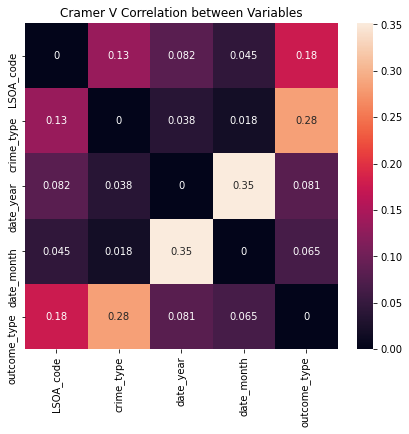

In [100]:
## Author Credit: https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792

def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))


cols = ["LSOA_code","crime_type","date_year", "date_month","outcome_type"]
corrM = np.zeros((len(cols),len(cols)))

for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(df[col1], df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

In [ ]:
dummy_year = pd.get_dummies(df["date_year"], prefix="crime_year")
dummy_month = pd.get_dummies(df["date_month"], prefix="crime_month")
dummy_crime_type = pd.get_dummies(df["crime_type"], prefix="crime_type")
dummy_lsoa_code = pd.get_dummies(df["LSOA_code"], prefix="LSOA_code")

In [ ]:
df = pd.concat([df, dummy_year, dummy_month, dummy_crime_type, dummy_lsoa_code], axis=1)
df.head()

,LSOA_code,outcome_type,crime_type,date_year,date_month,crime_year_2019,crime_year_2020,crime_year_2021,crime_year_2022,crime_month_1,...,LSOA_code_E01033727,LSOA_code_W01000359,LSOA_code_W01000446,LSOA_code_W01000728,LSOA_code_W01000887,LSOA_code_W01000941,LSOA_code_W01000959,LSOA_code_W01000960,LSOA_code_W01001061,LSOA_code_W01001405
0,E01023758,prosecuted,Burglary,2019,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,E01023926,not_prosecuted,Violence and sexual offences,2019,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,E01033314,prosecuted,Drugs,2019,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,E01023733,not_prosecuted,Drugs,2019,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,E01023804,not_prosecuted,Violence and sexual offences,2019,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop(["crime_type", "date_year", "date_month", "LSOA_code"], axis=1, inplace=True)

In [ ]:
df

,outcome_type,crime_year_2019,crime_year_2020,crime_year_2021,crime_year_2022,crime_month_1,crime_month_2,crime_month_3,crime_month_4,crime_month_5,...,LSOA_code_E01033727,LSOA_code_W01000359,LSOA_code_W01000446,LSOA_code_W01000728,LSOA_code_W01000887,LSOA_code_W01000941,LSOA_code_W01000959,LSOA_code_W01000960,LSOA_code_W01001061,LSOA_code_W01001405
0,prosecuted,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,not_prosecuted,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,prosecuted,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,not_prosecuted,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,not_prosecuted,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121355,not_prosecuted,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121356,not_prosecuted,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121357,not_prosecuted,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121358,not_prosecuted,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_encode = LabelEncoder()

In [ ]:
df['outcome_type'] = lb_encode.fit_transform(df['outcome_type'])
df.head()

,outcome_type,crime_year_2019,crime_year_2020,crime_year_2021,crime_year_2022,crime_month_1,crime_month_2,crime_month_3,crime_month_4,crime_month_5,...,LSOA_code_E01033727,LSOA_code_W01000359,LSOA_code_W01000446,LSOA_code_W01000728,LSOA_code_W01000887,LSOA_code_W01000941,LSOA_code_W01000959,LSOA_code_W01000960,LSOA_code_W01001061,LSOA_code_W01001405
0,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
lb_encode.classes_

array(['not_prosecuted', 'prosecuted'], dtype=object)

In [ ]:
df_outcome = df["outcome_type"]
df = pd.concat([df, df_outcome], axis=1)
df.head()

,outcome_type,crime_year_2019,crime_year_2020,crime_year_2021,crime_year_2022,crime_month_1,crime_month_2,crime_month_3,crime_month_4,crime_month_5,...,LSOA_code_W01000359,LSOA_code_W01000446,LSOA_code_W01000728,LSOA_code_W01000887,LSOA_code_W01000941,LSOA_code_W01000959,LSOA_code_W01000960,LSOA_code_W01001061,LSOA_code_W01001405,outcome_type
0,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.loc[:,~df.T.duplicated(keep='last')]
df.head()

,crime_year_2019,crime_year_2020,crime_year_2021,crime_year_2022,crime_month_1,crime_month_2,crime_month_3,crime_month_4,crime_month_5,crime_month_6,...,LSOA_code_W01000359,LSOA_code_W01000446,LSOA_code_W01000728,LSOA_code_W01000887,LSOA_code_W01000941,LSOA_code_W01000959,LSOA_code_W01000960,LSOA_code_W01001061,LSOA_code_W01001405,outcome_type
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['crime_year_2019', 'crime_year_2020', 'crime_year_2021',
       'crime_year_2022', 'crime_month_1', 'crime_month_2', 'crime_month_3',
       'crime_month_4', 'crime_month_5', 'crime_month_6',
       ...
       'LSOA_code_W01000359', 'LSOA_code_W01000446', 'LSOA_code_W01000728',
       'LSOA_code_W01000887', 'LSOA_code_W01000941', 'LSOA_code_W01000959',
       'LSOA_code_W01000960', 'LSOA_code_W01001061', 'LSOA_code_W01001405',
       'outcome_type'],
      dtype='object', length=1213)

In [ ]:
#df.to_csv(path_or_buf="D:/ADSP/Hertfordshire-Constabulary/data/final-one-hot-encoded.csv", index=False)

In [ ]:
#df.to_csv(path_or_buf="D:/ADSP/Hertfordshire-Constabulary/data/final-one-hot-encoded.csv", index=False)